<a href="https://colab.research.google.com/github/RKNahid/Automated-Sleep-Stage-Detection-using-Machine-Learning-Algorithm/blob/main/GBTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Library & Reading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(x_temp,y_temp):
  smote = SMOTE()

  x_temp, y_temp = smote.fit_resample(x_temp, y_temp)

  return x_temp, y_temp

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project/REM_NREM.csv")
target = "Sleep_Stage"

##Level Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df[target] = encoder.fit_transform(df[target])

##Spliting

In [6]:
x = df.loc[:,df.columns != target]
y = df[target]

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

*Balance Dataset*

In [8]:
x_train, y_train = balance(x_train, y_train)

# Tunning

##N estimator

4000/6000 round completed......................... Accurecy: 0.9339506172839506
5000/6000 round completed......................... Accurecy: 0.9361391694725028
6000/6000 round completed......................... Accurecy: 0.9363636363636364
The best n_estimators:
6000


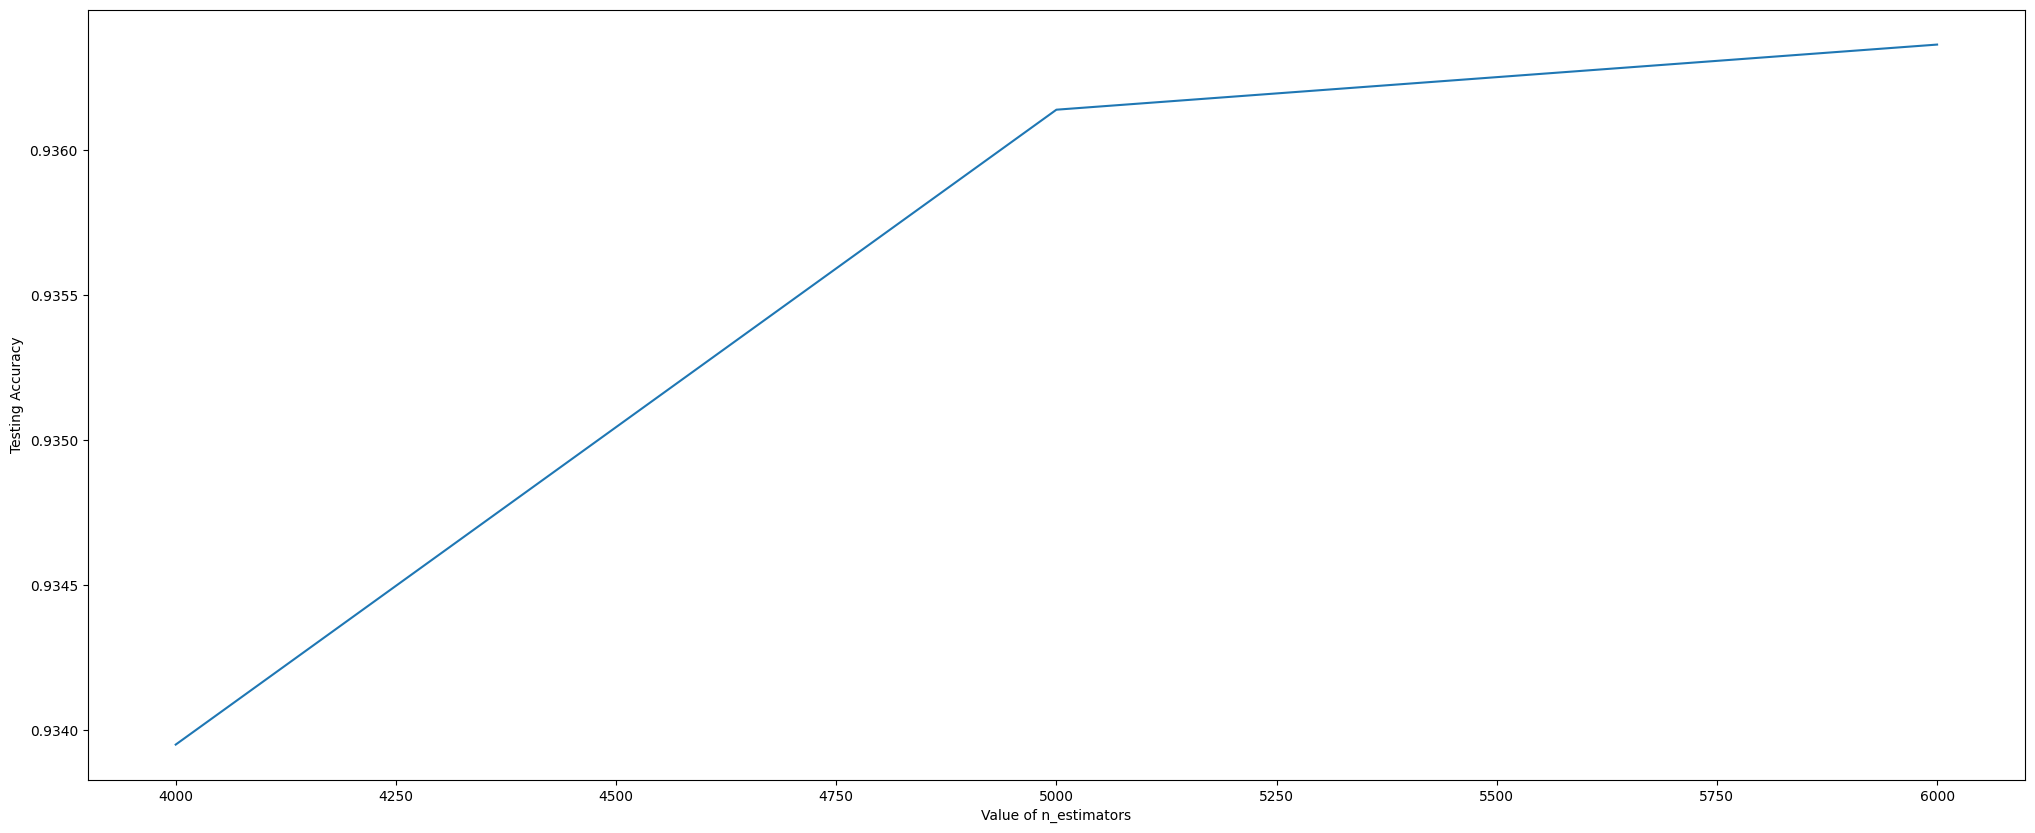

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=6000
k_range = range (4000,N+1,1000)


scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k)
  classifier.fit(x_train,y_train)
  y_pred=classifier.predict(x_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)



#5000

*Result for Best Estimator*

In [ ]:
%time

from sklearn.ensemble import GradientBoostingClassifier
gb_estimator = GradientBoostingClassifier(n_estimators=5000)
gb_estimator.fit(x_train, y_train)
y_pred=gb_estimator.predict(x_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

##Max Depth

In [1]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=500
k_range = range (1,N+1,100)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(x_train, y_train)
  y_pred=classifier.predict(x_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of max_depth')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)



#

NameError: ignored

*Result for Best Depth*

In [ ]:
%time
from sklearn.ensemble import GradientBoostingClassifier
gb_depth = GradientBoostingClassifier(max_depth=best_depth)
gb_depth.fit(x_train, y_train)
y_pred=gb_depth.predict(x_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


# Result for Full Config

In [ ]:
%time
from sklearn.ensemble import GradientBoostingClassifier
gb_all = GradientBoostingClassifier(max_depth=best_depth,n_estimators=best_estimator)
gb_all.fit(x_train, y_train)
y_pred=gb_all.predict(x_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
